## 모듈 불러오기

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [37]:
# 데이터 불러오기
boston = pd.read_csv("data/boston_missing.csv")

<img src="img/데이터 설명.PNG" style="width:600px;"/>

In [27]:
# 데이터의 shape확인
boston.shape

(506, 20)

In [28]:
# data 값 확인
boston.head()

,OBS.,TOWN,TOWN#,LON,LAT,MEDV,CMEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1,Nahant,0,-70.955,42.2550,24.0,NaN,0.00632,18.0,2.31,T,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,2,Swampscott,1,-70.950,42.2875,21.6,NaN,0.02731,0.0,7.07,T,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,3,Swampscott,1,-70.936,42.2830,NaN,NaN,0.02729,0.0,7.07,T,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,4,Marblehead,2,-70.928,42.2930,NaN,NaN,0.03237,0.0,2.18,T,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,5,Marblehead,2,-70.922,42.2980,NaN,NaN,0.06905,0.0,2.18,T,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [8]:
# 데이터 column 확인
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 20 columns):
OBS.       506 non-null int64
TOWN       506 non-null object
TOWN#      506 non-null int64
LON        506 non-null float64
LAT        506 non-null float64
MEDV       506 non-null float64
CMEDV      506 non-null float64
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       500 non-null object
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null int64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(14), int64(4), object(2)
memory usage: 79.2+ KB


## 데이터 전처리란 간단히 말해서 모델에 넣기전에 데이터를 가공하는 것!

## (1) 요약통계량 확인
### * describe() 함수를 사용
### * 수치형 변수에 관해서만 결과를 보여준다
### * 결측치는 제거하고 계산해준다

In [29]:
boston.describe()

,OBS.,TOWN#,LON,LAT,MEDV,CMEDV,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,501.000000,88.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,253.500000,47.531621,-71.056389,42.216440,22.446507,16.370455,3.613524,11.363636,11.136779,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,146.213884,27.571401,0.075405,0.061777,9.189284,4.782419,8.601545,23.322453,6.860353,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,1.000000,0.000000,-71.289500,42.030000,5.000000,7.000000,0.006320,0.000000,0.460000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,127.250000,26.250000,-71.093225,42.180775,16.800000,13.225000,0.082045,0.000000,5.190000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,253.500000,42.000000,-71.052900,42.218100,21.100000,16.100000,0.256510,0.000000,9.690000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,379.750000,78.000000,-71.019625,42.252250,25.000000,20.100000,3.677082,12.500000,18.100000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,506.000000,91.000000,-70.810000,42.381000,50.000000,29.800000,88.976200,100.000000,27.740000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


## 상관분석
### * 수치형 변수중에서 각각 2개의 column씩 상관관계를 보여준다
### * 값은 -1 ~ 1사이에서 존재한다
### * 절대값이 0.7이상이면 둘 사이의 관계가 밀접하게 관련이 되어있다고 볼 수 있다
### * 둘 사이의 관계가 높다고 인과관계로 잘못 해석하면 안 된다

In [12]:
boston.corr()

,OBS.,TOWN#,LON,LAT,MEDV,CMEDV,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
OBS.,1.000000,0.992287,-0.048973,-0.651668,-0.226604,-0.223373,0.407407,-0.103393,0.399439,0.398736,-0.079971,0.203784,-0.302211,0.686002,0.666626,0.291074,-0.295041,0.258465
TOWN#,0.992287,1.000000,-0.000627,-0.631648,-0.268006,-0.265134,0.447920,-0.123970,0.434426,0.429399,-0.117334,0.235141,-0.327280,0.724060,0.707982,0.341111,-0.306517,0.296600
LON,-0.048973,-0.000627,1.000000,0.143054,-0.320652,-0.322947,0.065101,-0.218081,0.062702,0.160871,-0.257110,0.204739,-0.011243,0.034067,0.050663,0.312602,-0.018300,0.195630
LAT,-0.651668,-0.631648,0.143054,1.000000,0.009660,0.006826,-0.084293,-0.129667,-0.041093,-0.068600,-0.069317,0.079035,-0.082981,-0.207013,-0.167718,-0.004527,0.105254,0.045660
MEDV,-0.226604,-0.268006,-0.320652,0.009660,1.000000,0.998476,-0.388305,0.360445,-0.483725,-0.427321,0.695360,-0.376955,0.249929,-0.381626,-0.468536,-0.507787,0.333461,-0.737663
CMEDV,-0.223373,-0.265134,-0.322947,0.006826,0.998476,1.000000,-0.389582,0.360386,-0.484754,-0.429300,0.696304,-0.377999,0.249315,-0.384766,-0.471979,-0.505655,0.334861,-0.740836
CRIM,0.407407,0.447920,0.065101,-0.084293,-0.388305,-0.389582,1.000000,-0.200469,0.406583,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,-0.103393,-0.123970,-0.218081,-0.129667,0.360445,0.360386,-0.200469,1.000000,-0.533828,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,0.399439,0.434426,0.062702,-0.041093,-0.483725,-0.484754,0.406583,-0.533828,1.000000,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
NOX,0.398736,0.429399,0.160871,-0.068600,-0.427321,-0.429300,0.420972,-0.516604,0.763651,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879


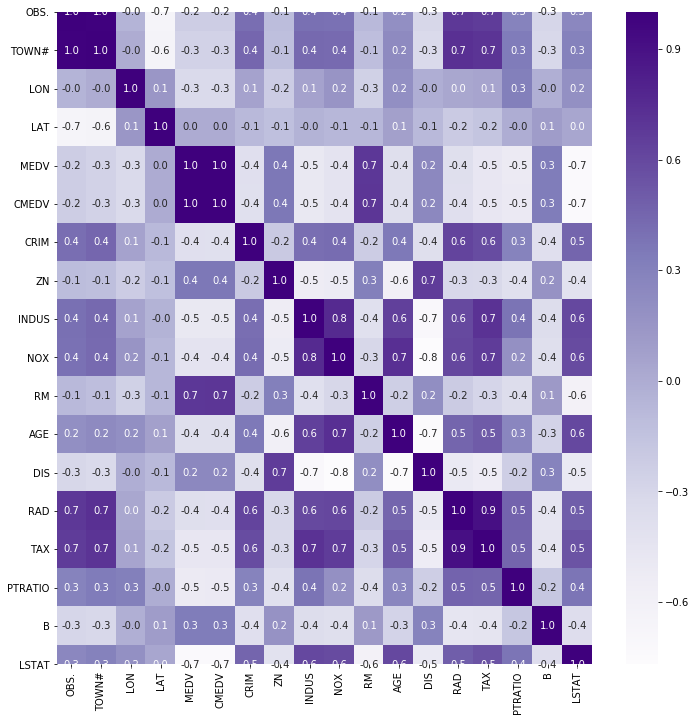

In [24]:
# 상관관계 시각화
# seaborn모듈 안 heatmap함수를 통해서 구현 가능
# data : corr()함수를 통해 나온 결과
# annot : default는 False / True로 설정하면 해당 필드에 값을 보여줌
# fmt : 값 소숫점 표현
# cmap : 그라데이션 색깔 설정
# Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds', 'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu','GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn'
# 'PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu', 'RdYlBu', 'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic'
plt.figure(figsize=(12,12))
sns.heatmap(data = boston.corr(), annot=True, fmt = '.1f', cmap='Purples')

## 결측치 처리
### 결측치란 해당 필드에 값이 존재하지 않은것을 의미
### 1) 결측치의 숫자가 매우 적다면 이들을 삭제하고 분석
### 2) 결측치의 숫자가 어느정도 존재하면 값을 대체

In [38]:
# NA 확인
na_dic={'index': list(range(0, boston.shape[1])),
        'column type': boston.dtypes,
        'null values(num)': boston.isnull().sum(),
        'null values(%)': boston.isnull().sum() / boston.shape[0] * 100}
na = pd.DataFrame(na_dic).T
na

,OBS.,TOWN,TOWN#,LON,LAT,MEDV,CMEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
index,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
column type,int64,object,int64,float64,float64,float64,float64,float64,float64,float64,object,float64,float64,float64,float64,int64,int64,float64,float64,float64
null values(num),0,0,0,0,0,5,418,0,0,0,6,0,0,0,0,0,0,0,0,0
null values(%),0,0,0,0,0,0.988142,82.6087,0,0,0,1.18577,0,0,0,0,0,0,0,0,0


In [39]:
# CMEDV column은 제거
boston.drop(['CMEDV'], axis=1, inplace=True)

In [40]:
# MEDV는 중위 값으로 대체
boston_median = boston.MEDV.describe()['50%']
boston['MEDV'].fillna(boston_median, inplace=True)

In [48]:
# CHAS 6개 값을 제거
boston = boston[boston.CHAS.notnull()]

In [49]:
# NA 재확인
na_dic={'index': list(range(0, boston.shape[1])),
        'column type': boston.dtypes,
        'null values(num)': boston.isnull().sum(),
        'null values(%)': boston.isnull().sum() / boston.shape[0] * 100}
na = pd.DataFrame(na_dic).T
na

,OBS.,TOWN,TOWN#,LON,LAT,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
index,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
column type,int64,object,int64,float64,float64,float64,float64,float64,float64,object,float64,float64,float64,float64,int64,int64,float64,float64,float64
null values(num),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
null values(%),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## 이상치 처리
### * 이상치란 기존 데이터들로부터 동떨어진 데이터
### * 측정오류나 잘못된 입력으로 인해 이상치가 포함될 수 있음
### * 이상치가 포함된 데이터로 만든 모델은 정확한 결과를 낼 수 없으며 신뢰도가 떨어짐
### * 주로 boxplot을 통해서 판단

<img src="img/boxplot.PNG" style="width:600px;"/>

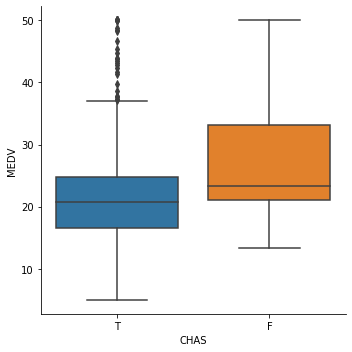

In [50]:
# boxplot 시각화
sns.catplot(x='CHAS', y="MEDV", kind='box', data=boston)

In [56]:
# 결측치 제거
temp = boston[boston.CHAS == 'T'].describe()['MEDV']['75%']
temp2 = boston[(boston.CHAS == 'T') & (boston.MEDV > temp)]
boston[~boston.index.isin(temp2.index)]

,OBS.,TOWN,TOWN#,LON,LAT,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1,Nahant,0,-70.9550,42.2550,24.0,0.00632,18.0,2.31,T,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,2,Swampscott,1,-70.9500,42.2875,21.6,0.02731,0.0,7.07,T,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,3,Swampscott,1,-70.9360,42.2830,21.1,0.02729,0.0,7.07,T,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,4,Marblehead,2,-70.9280,42.2930,21.1,0.03237,0.0,2.18,T,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,5,Marblehead,2,-70.9220,42.2980,21.1,0.06905,0.0,2.18,T,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,502,Winthrop,91,-70.9860,42.2312,22.4,0.06263,0.0,11.93,T,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,503,Winthrop,91,-70.9910,42.2275,20.6,0.04527,0.0,11.93,T,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,504,Winthrop,91,-70.9948,42.2260,23.9,0.06076,0.0,11.93,T,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,505,Winthrop,91,-70.9875,42.2240,22.0,0.10959,0.0,11.93,T,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


## 데이터 표준화/정규화

<img src="img/표준화.정규화.PNG" style="width:600px;"/>

In [62]:
# NOX, AGE column 불러오기 
boston2 = boston[['NOX', 'AGE']]
boston2

,NOX,AGE
0,0.538,65.2
1,0.469,78.9
2,0.469,61.1
3,0.458,45.8
4,0.458,54.2
...,...,...
501,0.573,69.1
502,0.573,76.7
503,0.573,91.0
504,0.573,89.3


In [72]:
from sklearn.preprocessing import StandardScaler

# scaler 생성
standard_scaler = StandardScaler()

# scaler 학습
standard_scaler.fit(boston2)

# scaler 적용
boston_scaled = standard_scaler.transform(boston2)

# 최종 데이터프레임 만들기
pd.DataFrame(boston_scaled, columns=boston2.columns)

,NOX,AGE
0,-0.149387,-0.126987
1,-0.743376,0.361865
2,-0.743376,-0.273286
3,-0.838070,-0.819230
4,-0.838070,-0.519496
...,...,...
495,0.151911,0.012175
496,0.151911,0.283363
497,0.151911,0.793624
498,0.151911,0.732964


In [75]:
from sklearn.preprocessing import MinMaxScaler

# scaler 생성
min_max_scaler = MinMaxScaler()

# scaler 학습
min_max_scaler.fit(boston2)

# sclaer 적용
boston_scaled = min_max_scaler.transform(boston2)

# 최종 데이터프레임 만들기
pd.DataFrame(boston_scaled, columns=boston2.columns)

,NOX,AGE
0,0.314815,0.641607
1,0.172840,0.782698
2,0.172840,0.599382
3,0.150206,0.441813
4,0.150206,0.528321
...,...,...
495,0.386831,0.681771
496,0.386831,0.760041
497,0.386831,0.907312
498,0.386831,0.889804


## 새로운 feature 생성

In [3]:
# 통신 txt 불러오기
call = pd.read_csv("data/통신.txt", sep=" ")

In [4]:
call

,ID,주민번호,직종,가입통신사,통화료
1,2009SP001,720521-1******,컨설팅/솔루션,KTF,30000
2,2009SP002,800310-2******,금융,SK 텔레콤,50000
3,2009SP003,810626-2******,금융,SK 텔레콤,23000
4,2009SP004,781007-1******,기타,SK 텔레콤,50000
5,2009SP005,771117-2******,기타,LG 텔레콤,80000
...,...,...,...,...,...
96,2009SP096,760903-2******,교육기관(학생포함),L G 텔 레 콤,23000
97,2009SP097,790318-1******,통신,SK 텔레콤,61000
98,2009SP098,801211-2******,교육기관(학생포함),SK 텔레콤,28000
99,2009SP099,800414-2******,금융,SK 텔레콤,85000


## 실습

## 1. '성별'이라는 column 추가하기

In [6]:
from tqdm import tqdm

gender = []

for i in tqdm(range(call.shape[0])):
    check = call['주민번호'].iloc[i]
    if check[7]=='1':
        gender.append('M')
    else:
        gender.append('F')
        


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 9995.72it/s]


In [84]:
call['성별'] = ['M' if x[7]=='1' else 'F' for x in call['주민번호']]
call.head()

,ID,주민번호,직종,가입통신사,통화료,성별
1,2009SP001,720521-1******,컨설팅/솔루션,KTF,30000,M
2,2009SP002,800310-2******,금융,SK 텔레콤,50000,F
3,2009SP003,810626-2******,금융,SK 텔레콤,23000,F
4,2009SP004,781007-1******,기타,SK 텔레콤,50000,M
5,2009SP005,771117-2******,기타,LG 텔레콤,80000,F


## 2. 가입통신사 띄어쓰기 지우기

In [89]:
call['가입통신사'] = [x.replace(" ","") for x in call['가입통신사']]

## 3. 통신사별 평균요금 column 생성

In [97]:
temp = call.groupby('가입통신사')['통화료'].mean()
temp2  = pd.merge(call, temp, how='inner', on='가입통신사')
temp2.rename({'통화료_x':'통화료', '통화료_y':'평균통화료'}, axis=1, inplace=True)
temp2

,ID,주민번호,직종,가입통신사,통화료,성별,평균통화료
0,2009SP001,720521-1******,컨설팅/솔루션,KTF,30000,M,35821.428571
1,2009SP019,800914-2******,컨설팅/솔루션,KTF,35000,F,35821.428571
2,2009SP020,800924-2******,금융,KTF,50000,F,35821.428571
3,2009SP022,820302-2******,컨설팅/솔루션,KTF,25000,F,35821.428571
4,2009SP023,731122-2******,컨설팅/솔루션,KTF,30000,F,35821.428571
...,...,...,...,...,...,...,...
95,2009SP088,630629-2******,공공기관,LG텔레콤,51000,F,40071.428571
96,2009SP089,711011-1******,도소매유통,LG텔레콤,41000,M,40071.428571
97,2009SP095,740925-1******,통신,LG텔레콤,27000,M,40071.428571
98,2009SP096,760903-2******,교육기관(학생포함),LG텔레콤,23000,F,40071.428571
